In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [2]:
#Load all data
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [10]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


# Project Plan

In order to determine whether a user will leave the telecom company, we will use the following steps to create a predictive model.

## Preprocessing tasks:

- Missing values in df_internet and df_phone need to be addressed in order to have the same number of entries for each database.
- Correct all category names to lowercase
- use one hot encoding for all categorical variables.
- Ensure that all categories are in the correct data format. Convert categories when needed.
- Create a new column that indicates whether a customer has left or not.

## Project steps:

1. Download the data.
2. Perform preproccessing steps.
3. Perform EDA.
4. Combine all dataframes into one dataframe. 
5. Fill in NA's where possible. 
6. Scale the dataframe to ensure consistency amongst the features.
7. Test 3-5 classification models.
8. Tune the models to get get the best AUC-ROC and accuracy measurements.
9. Perform further model optimization with techniques such as LightGBM.
10. Select the most accurate model.
11. Draft conclusions and report.

# Project Code

In [11]:
#To indicate whether a person has phone service or not

df_phone['phone'] = 'Yes'

In [12]:
data = df_contract.merge(df_personal)
data = data.merge(df_internet, how='outer')
df = data.merge(df_phone, how='outer')

In [13]:
#Make column titles lowercase

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  internetservice   5517 non-null   object 
 13  onlinesecurity    5517 non-null   object 
 14  onlinebackup      5517 non-null   object 
 15  deviceprotection  5517 non-null   object 
 16  techsupport       5517 non-null   object 


In [14]:
df.describe()

,monthlycharges,seniorcitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [15]:
#Fill missing values from customers not having all of the services

fillcolumns = ['internetservice', 'onlinesecurity', 'onlinebackup',
               'deviceprotection', 'techsupport', 'streamingtv', 
               'streamingmovies', 'multiplelines', 'phone']

df[fillcolumns] = df[fillcolumns].fillna('No')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [17]:
#Creating a new column that signifies churn.

df.loc[df['enddate'] == 'No', 'active'] = 'Yes'
df['active'] = df['active'].fillna('No')

In [18]:
# Shows that all missing values from total charges are because the account is recent enough that they have not been charged yet.
# This also indicates that the current date is 2020-02-01.

df.loc[df['totalcharges'] == ' ',:]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,phone,active
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,No,No,Yes
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,...,No,No,No,No,No,No,No,No,Yes,Yes
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,...,No,No,No,No,No,No,No,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,...,No,No,No,No,No,No,No,No,Yes,Yes
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,...,No,No,No,No,No,No,No,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,...,No,No,No,No,No,No,No,No,Yes,Yes
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,...,No,No,No,No,No,No,No,No,Yes,Yes
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes


In [19]:
# All 'No' answers from enddate will be converted to the current date to determine the total length of service.
# Empty values from data['totalcharges'] will be converted to 0 to reflect those customers have not been charged yet.

df['enddate'] = df['enddate'].replace('No', '2020-02-01 00:00:00')
df['totalcharges'] = df['totalcharges'].replace(' ', 0)

In [20]:
# Convert datatypes

df['totalcharges'] = df['totalcharges'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  internetservice   7043 non-null   object 
 13  onlinesecurity    7043 non-null   object 
 14  onlinebackup      7043 non-null   object 
 15  deviceprotection  7043 non-null   object 
 16  techsupport       7043 non-null   object 


In [22]:
# Convert dates to datetime.
# Create new column indicating total length of service

df['begindate'] = pd.to_datetime(df['begindate'], format= '%Y-%m-%d')
df['enddate'] = pd.to_datetime(df['enddate'], format= '%Y-%m-%d %H:%M:%S')
df['lengthofservice'] = df['enddate'] - df['begindate']
df['lengthofservice'] = df['lengthofservice'].dt.days

In [23]:
#These columns will be dropped as they are not relevant to the outcome.
df = df.drop(['customerid', 'begindate', 'enddate'], axis = 1)

Yes    5174
No     1869
Name: active, dtype: int64

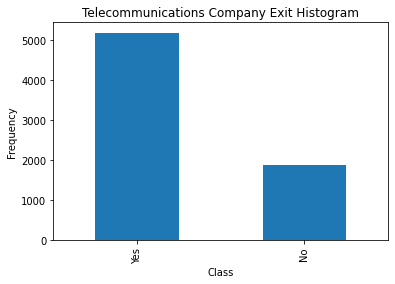

In [24]:
# Rare outcomes are determined.
pd.value_counts(df['active']).plot.bar()
plt.title('Telecommunications Company Exit Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['active'].value_counts()

In [25]:
# Use OHE to prepare categorical features.

df = pd.get_dummies(df, drop_first=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         7043 non-null   float64
 1   totalcharges                           7043 non-null   float64
 2   seniorcitizen                          7043 non-null   int64  
 3   lengthofservice                        7043 non-null   int64  
 4   type_One year                          7043 non-null   uint8  
 5   type_Two year                          7043 non-null   uint8  
 6   paperlessbilling_Yes                   7043 non-null   uint8  
 7   paymentmethod_Credit card (automatic)  7043 non-null   uint8  
 8   paymentmethod_Electronic check         7043 non-null   uint8  
 9   paymentmethod_Mailed check             7043 non-null   uint8  
 10  gender_Male                            7043 non-null   uint8  
 11  part

In [27]:
# Split data into 3 portions; 80% for training, 10% for validation, and 10% for testing.

df_train, df_rem = train_test_split(df, train_size = 0.8, random_state=54321)
df_valid, df_test = train_test_split(df_rem, train_size = 0.5, random_state=54321)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 1506 to 2641
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         5634 non-null   float64
 1   totalcharges                           5634 non-null   float64
 2   seniorcitizen                          5634 non-null   int64  
 3   lengthofservice                        5634 non-null   int64  
 4   type_One year                          5634 non-null   uint8  
 5   type_Two year                          5634 non-null   uint8  
 6   paperlessbilling_Yes                   5634 non-null   uint8  
 7   paymentmethod_Credit card (automatic)  5634 non-null   uint8  
 8   paymentmethod_Electronic check         5634 non-null   uint8  
 9   paymentmethod_Mailed check             5634 non-null   uint8  
 10  gender_Male                            5634 non-null   uint8  
 11  p

In [29]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 2952 to 5928
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         704 non-null    float64
 1   totalcharges                           704 non-null    float64
 2   seniorcitizen                          704 non-null    int64  
 3   lengthofservice                        704 non-null    int64  
 4   type_One year                          704 non-null    uint8  
 5   type_Two year                          704 non-null    uint8  
 6   paperlessbilling_Yes                   704 non-null    uint8  
 7   paymentmethod_Credit card (automatic)  704 non-null    uint8  
 8   paymentmethod_Electronic check         704 non-null    uint8  
 9   paymentmethod_Mailed check             704 non-null    uint8  
 10  gender_Male                            704 non-null    uint8  
 11  pa

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 1242 to 5595
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         705 non-null    float64
 1   totalcharges                           705 non-null    float64
 2   seniorcitizen                          705 non-null    int64  
 3   lengthofservice                        705 non-null    int64  
 4   type_One year                          705 non-null    uint8  
 5   type_Two year                          705 non-null    uint8  
 6   paperlessbilling_Yes                   705 non-null    uint8  
 7   paymentmethod_Credit card (automatic)  705 non-null    uint8  
 8   paymentmethod_Electronic check         705 non-null    uint8  
 9   paymentmethod_Mailed check             705 non-null    uint8  
 10  gender_Male                            705 non-null    uint8  
 11  pa

In [31]:
# Define features and target for training set, validation set, and test set.

features_train = df_train.drop(['active_Yes'], axis=1)
target_train = df_train['active_Yes']
features_valid = df_valid.drop(['active_Yes'], axis=1)
target_valid = df_valid['active_Yes']
features_test = df_test.drop(['active_Yes'], axis=1)
target_test = df_test['active_Yes']

In [32]:
# All numerical categories will be scaled.
scaler = StandardScaler().fit(features_train)
numerical_columns = ['monthlycharges', 'totalcharges', 'lengthofservice']
scaler.fit(features_train[numerical_columns])
features_train[numerical_columns] = scaler.transform(features_train[numerical_columns])
features_valid[numerical_columns] = scaler.transform(features_valid[numerical_columns])
features_test[numerical_columns] = scaler.transform(features_test[numerical_columns])

In [33]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 1506 to 2641
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         5634 non-null   float64
 1   totalcharges                           5634 non-null   float64
 2   seniorcitizen                          5634 non-null   int64  
 3   lengthofservice                        5634 non-null   float64
 4   type_One year                          5634 non-null   uint8  
 5   type_Two year                          5634 non-null   uint8  
 6   paperlessbilling_Yes                   5634 non-null   uint8  
 7   paymentmethod_Credit card (automatic)  5634 non-null   uint8  
 8   paymentmethod_Electronic check         5634 non-null   uint8  
 9   paymentmethod_Mailed check             5634 non-null   uint8  
 10  gender_Male                            5634 non-null   uint8  
 11  p

In [34]:
# RandomForestClassifier method

best_score = 0
best_est = 0
best_depth = 0
list = [10, 20, 50, 100, 150, 200]
#loop in a loop
for depth in range (1,11):
    for est in list:
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) #max depth
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid) 
        score = roc_auc_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
print("AUC-ROC score of the best model on the valid set (n_estimators = {}, depth = {}): {}".format(est, depth, score))

AUC-ROC score of the best model on the valid set (n_estimators = 200, depth = 10): 0.7261440029202113


In [35]:
#LogisticRegression method

model = LogisticRegression(random_state=54321, solver = 'liblinear') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print('AUC-ROC', roc_auc_score(target_valid, predicted_valid))

AUC-ROC 0.7493485292477413


In [36]:
#DecisionTreeClassifier method

for depth in range(1,20):
    model = DecisionTreeClassifier(random_state= 54321, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    print("max_depth valid = ", depth, ": ", end='')
    print(roc_auc_score(target_valid, predictions_valid))

max_depth valid =  1 : 0.6587966295894466
max_depth valid =  2 : 0.6067398071443781
max_depth valid =  3 : 0.6378278900459324
max_depth valid =  4 : 0.7121563935390325
max_depth valid =  5 : 0.7092767407197104
max_depth valid =  6 : 0.710599961469434
max_depth valid =  7 : 0.7163592671080783
max_depth valid =  8 : 0.7370846557091145
max_depth valid =  9 : 0.7457793820913987
max_depth valid =  10 : 0.7379515934416923
max_depth valid =  11 : 0.7582206990255822
max_depth valid =  12 : 0.7385295519300772
max_depth valid =  13 : 0.7355383632621193
max_depth valid =  14 : 0.7563195197874735
max_depth valid =  15 : 0.7565527311073482
max_depth valid =  16 : 0.7371505632560356
max_depth valid =  17 : 0.7303012481875424
max_depth valid =  18 : 0.7701955933200166
max_depth valid =  19 : 0.7284000689494337


Depth of 18 is ideal for DecisionTreeClassifier

Out of the three models tested, DecisionTreeClassifier scored the best with a max_depth of 18.

In [37]:
# RandomForestClassifier method with balanced classes

best_score = 0
best_est = 0
best_depth = 0
list = [10, 20, 50, 100, 150, 200]
#loop in a loop
for depth in range (1,11):
    for est in list:
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth, class_weight='balanced') #max depth
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid) 
        score = roc_auc_score(target_valid, predicted_valid)
        if score > best_score:
            best_score = score
            best_est = est
            best_depth = depth
print("AUC-ROC score of the best model on the valid set (n_estimators = {}, depth = {}): {}".format(est, depth, score))

AUC-ROC score of the best model on the valid set (n_estimators = 200, depth = 10): 0.7985814667978057


In [38]:
#LogisticRegression method with balanced classes

model = LogisticRegression(random_state=54321, solver = 'liblinear', class_weight = 'balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print('AUC-ROC', roc_auc_score(target_valid, predicted_valid))

AUC-ROC 0.7888626385325939


In [39]:
#DecisionTreeClassifier method with balanced classes

for depth in range(1,20):
    model = DecisionTreeClassifier(random_state= 54321, max_depth=depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    print("max_depth valid = ", depth, ": ", end='')
    print(roc_auc_score(target_valid, predictions_valid))

max_depth valid =  1 : 0.6468825730306319
max_depth valid =  2 : 0.7436297820995103
max_depth valid =  3 : 0.7436297820995103
max_depth valid =  4 : 0.7749865650000507
max_depth valid =  5 : 0.7686036725713067
max_depth valid =  6 : 0.7979578800077061
max_depth valid =  7 : 0.7779219857436906
max_depth valid =  8 : 0.7784999442320757
max_depth valid =  9 : 0.7912201007878487
max_depth valid =  10 : 0.793288583798911
max_depth valid =  11 : 0.7881072366486519
max_depth valid =  12 : 0.7908094460724172
max_depth valid =  13 : 0.7570749216714154
max_depth valid =  14 : 0.7570749216714154
max_depth valid =  15 : 0.7518935745211563
max_depth valid =  16 : 0.7561522160145199
max_depth valid =  17 : 0.7363495330703791
max_depth valid =  18 : 0.7558074688460096
max_depth valid =  19 : 0.7471127424637254


In [40]:
model = DecisionTreeClassifier(random_state= 54321, max_depth=6, class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
predictions_train = model.predict(features_train)

print(roc_auc_score(target_test, predictions_test))

0.7472986247544204


In [41]:
#LogisticRegression method with balanced classes

model = LogisticRegression(random_state=54321, solver = 'liblinear', class_weight = 'balanced') 
model.fit(features_train, target_train)
predicted_test = model.predict(features_test) 

print('AUC-ROC', roc_auc_score(target_test, predicted_test))

AUC-ROC 0.764965318150836


The AUC-ROC score is not sufficient. Furthe model optimization will be explored via lightgbm gradient boosting.

In [42]:
train_data = lgb.Dataset(features_train, label=target_train)
valid_data = lgb.Dataset(features_valid, label=target_valid)
test_data = lgb.Dataset(features_test, label=target_test)

In [43]:
parameters_1 = {'objective': 'regression',
             'metric': 'auc',
             'is_unbalance':'true',
             'boosting' : 'gbdt',
             'num_leaves': 5,
             'feature_fraction': 0.5,
             'bagging_fraction': 0.5,
             'bagging_freq': 20,
             'learning_rate': 0.01,
              'verbose': -1
             }

parameters_2 = {'objective': 'regression',
             'metric': 'auc',
             'is_unbalance':'true',
             'boosting' : 'gbdt',
             'num_leaves': 10,
             'feature_fraction': 0.5,
             'bagging_fraction': 0.5,
             'bagging_freq': 20,
             'learning_rate': 0.01,
              'verbose': -1
             }

parameters_3 = {'objective': 'regression',
             'metric': 'auc',
             'is_unbalance':'true',
             'boosting' : 'gbdt',
             'num_leaves': 15,
             'feature_fraction': 0.2,
             'bagging_fraction': 0.2,
             'bagging_freq': 20,
             'learning_rate': 0.01,
              'verbose': -1
             }


In [44]:
model_lgbm1 = lgb.train(parameters_1, train_set = train_data, valid_sets=valid_data, num_boost_round=5000, early_stopping_rounds=50)

[1]	valid_0's auc: 0.757202
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.851769
[3]	valid_0's auc: 0.846238
[4]	valid_0's auc: 0.842466
[5]	valid_0's auc: 0.842243
[6]	valid_0's auc: 0.851308
[7]	valid_0's auc: 0.853771
[8]	valid_0's auc: 0.854491
[9]	valid_0's auc: 0.856205
[10]	valid_0's auc: 0.853128
[11]	valid_0's auc: 0.858659
[12]	valid_0's auc: 0.856043
[13]	valid_0's auc: 0.856763
[14]	valid_0's auc: 0.856894
[15]	valid_0's auc: 0.857599
[16]	valid_0's auc: 0.858101
[17]	valid_0's auc: 0.85839
[18]	valid_0's auc: 0.860144
[19]	valid_0's auc: 0.861107
[20]	valid_0's auc: 0.860712
[21]	valid_0's auc: 0.860864
[22]	valid_0's auc: 0.86022


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[23]	valid_0's auc: 0.860768
[24]	valid_0's auc: 0.860377
[25]	valid_0's auc: 0.860884
[26]	valid_0's auc: 0.861194
[27]	valid_0's auc: 0.862684
[28]	valid_0's auc: 0.862644
[29]	valid_0's auc: 0.86239
[30]	valid_0's auc: 0.862654
[31]	valid_0's auc: 0.862968
[32]	valid_0's auc: 0.862735
[33]	valid_0's auc: 0.86387
[34]	valid_0's auc: 0.86382
[35]	valid_0's auc: 0.864215
[36]	valid_0's auc: 0.86386
[37]	valid_0's auc: 0.863546
[38]	valid_0's auc: 0.863931
[39]	valid_0's auc: 0.863374
[40]	valid_0's auc: 0.863161
[41]	valid_0's auc: 0.864225
[42]	valid_0's auc: 0.863592
[43]	valid_0's auc: 0.864565
[44]	valid_0's auc: 0.865016
[45]	valid_0's auc: 0.86419
[46]	valid_0's auc: 0.863034
[47]	valid_0's auc: 0.863146
[48]	valid_0's auc: 0.86276
[49]	valid_0's auc: 0.862862
[50]	valid_0's auc: 0.863034
[51]	valid_0's auc: 0.863652
[52]	valid_0's auc: 0.863962
[53]	valid_0's auc: 0.864327
[54]	valid_0's auc: 0.863779
[55]	valid_0's auc: 0.863353
[56]	valid_0's auc: 0.86276
[57]	valid_0's auc: 0

In [45]:
model_lgbm2 = lgb.train(parameters_2, train_set = train_data, valid_sets=valid_data, num_boost_round=5000, early_stopping_rounds=50)

[1]	valid_0's auc: 0.820529
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.847115
[3]	valid_0's auc: 0.852073
[4]	valid_0's auc: 0.84783
[5]	valid_0's auc: 0.85297
[6]	valid_0's auc: 0.860347
[7]	valid_0's auc: 0.861006
[8]	valid_0's auc: 0.864905
[9]	valid_0's auc: 0.86565
[10]	valid_0's auc: 0.865209
[11]	valid_0's auc: 0.868378
[12]	valid_0's auc: 0.86854
[13]	valid_0's auc: 0.86748
[14]	valid_0's auc: 0.868271
[15]	valid_0's auc: 0.869904
[16]	valid_0's auc: 0.870811
[17]	valid_0's auc: 0.870096
[18]	valid_0's auc: 0.87218
[19]	valid_0's auc: 0.871774
[20]	valid_0's auc: 0.871054
[21]	valid_0's auc: 0.871663
[22]	valid_0's auc: 0.871435
[23]	valid_0's auc: 0.87149
[24]	valid_0's auc: 0.870902
[25]	valid_0's auc: 0.8704
[26]	valid_0's auc: 0.870355
[27]	valid_0's auc: 0.870355
[28]	valid_0's auc: 0.870755
[29]	valid_0's auc: 0.870887
[30]	valid_0's auc: 0.870553
[31]	valid_0's auc: 0.870228
[32]	valid_0's auc: 0.870563
[33]	valid_0's auc: 0.870553


In [46]:
model_lgbm3 = lgb.train(parameters_3, train_set = train_data, valid_sets=valid_data, num_boost_round=5000, early_stopping_rounds=50)

[1]	valid_0's auc: 0.715345
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.792153
[3]	valid_0's auc: 0.833087
[4]	valid_0's auc: 0.840124
[5]	valid_0's auc: 0.839911
[6]	valid_0's auc: 0.846248
[7]	valid_0's auc: 0.845371
[8]	valid_0's auc: 0.847814
[9]	valid_0's auc: 0.84822
[10]	valid_0's auc: 0.843738
[11]	valid_0's auc: 0.84711
[12]	valid_0's auc: 0.844524
[13]	valid_0's auc: 0.847774
[14]	valid_0's auc: 0.848859
[15]	valid_0's auc: 0.846882
[16]	valid_0's auc: 0.8482
[17]	valid_0's auc: 0.852413
[18]	valid_0's auc: 0.853893
[19]	valid_0's auc: 0.854552
[20]	valid_0's auc: 0.854522
[21]	valid_0's auc: 0.855455
[22]	valid_0's auc: 0.855551
[23]	valid_0's auc: 0.857295
[24]	valid_0's auc: 0.857427
[25]	valid_0's auc: 0.859039
[26]	valid_0's auc: 0.859495
[27]	valid_0's auc: 0.860357
[28]	valid_0's auc: 0.861077
[29]	valid_0's auc: 0.860915
[30]	valid_0's auc: 0.861696
[31]	valid_0's auc: 0.861665
[32]	valid_0's auc: 0.861848
[33]	valid_0's auc: 0.86

In [47]:
y_train_pred = model_lgbm2.predict(features_train)
y_valid_pred = model_lgbm2.predict(features_valid)
y_test_pred = model_lgbm2.predict(features_test)
                                  
('AUC Train: {:.4f}  AUC Valid: {:.4f}'.format(roc_auc_score(target_train, y_train_pred), 
                                                   roc_auc_score(target_valid, y_valid_pred)))

'AUC Train: 0.8950  AUC Valid: 0.8969'

The validation set achieved a sufficient AUC-ROC score. This model will be applied to the test set.

In [51]:
y_test_pred = model_lgbm2.predict(features_test)
('AUC Test: {:.4f}'.format(roc_auc_score(target_test, y_test_pred)))

'AUC Test: 0.8586'

The lightgbm model using parameters_2 achieved the best AUC-ROC score for the validation set. This model was then applied to the test set to achieve a AUC score of 0.8586. This score is suffient for this application.

# Summary

All data tables were combined to form one master table with all data. This left many missing values as not all customers had all of the services provided. These missing values were handled by indicating that the customer does not have that service. All numerical values then needed to be converted to numerical data types and dates needed to be converted to datetime. A new column (active) was created to indicate a binary classification of whether that customer had left the company or not (churn). An additional new column was created to show the total length of service for each customer. As there were data points that had a monthly charge but had 0 for total charge (indicating that a payment had not yet been made) the current date was indicated to be 1 month after these data points (February 1st, 2020). After this column was created, the begin date and end date became redundant information allowing those columns to be deleted. Furthermore the customerid column is only for identification purposes so that column was also deleted. All numerical values were then scaled and categorical features were prepared via OHE.

The data was split into training, validation, and test sets. Validation and test sets each comprised of 10% of the data while the remaining 80% was allocated to the training set. Randomforestclassifier, Decisiontreeclassifier, and Logisticregression were all used initially with hyperparameter tuning. None of these models achieved a sufficient AUC-ROC score. EDA indicated a class imbalance so all of these models were run again with their best performing hyperparameters and with balanced classes. The LogisticRegression model with balanced classes performed the best and satisfied the criteria (>0.75) but further optimization is possible. Several sets of parameters were tested with Lightgbm gradient boosting. The best set of parameters was selected (parameters_2) and was applied to the validation set and then the test set. The test set achieved an AUC score of 0.8586 which is a satisfactory score.